In [5]:
import os
import numpy as np
import cv2 
import pytesseract
from matplotlib import pyplot as plt
import easyocr
import pandas as pd

/home/wesee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
folderPath = os.getcwd() + '/Imgs'

In [3]:
os.listdir(folderPath)

['sample 12.jpg',
 'samlpe 7.jpg',
 'sample 3.jpeg',
 'sample 8.jpeg',
 'sample 1.jpeg',
 'sample 6.jpeg',
 'sample 10.jpg',
 'sample 13.jpg',
 'sample 2.jpeg',
 'sample 9.jpg',
 'sample 11.jpg']

In [98]:

def crop_image(image):
    # Convert image to binary
    print(image.shape)
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the largest contour
    max_contour = max(contours, key=cv2.contourArea)
    
    # Get bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(max_contour)

    # Crop the inverted binary image using the bounding box
    cropped_binary = binary[y:y+h, x:x+w]

    # Invert back to get the cropped image with text
    cropped_image = cv2.bitwise_not(cropped_binary)

    return cropped_image


def change_perspective(image):
    # Find contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get the contour with the largest area
    max_contour = max(contours, key=cv2.contourArea)
    
    # Get the convex hull of the largest contour
    hull = cv2.convexHull(max_contour)
    
    # Apply perspective transformation
    rect = cv2.minAreaRect(hull)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    width = int(rect[1][0])
    height = int(rect[1][1])
    src_pts = box.astype("float32")
    dst_pts = np.array([[0, height-1], [0, 0], [width-1, 0], [width-1, height-1]], dtype="float32")
    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    corrected_image = cv2.warpPerspective(image, M, (width, height))
    
    return corrected_image


def preprocess_image(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv2.filter2D(gray, -1, sharpen_kernel)

    # Crop image to remove unnecessary parts
    cropped_image = crop_image(sharpen)

    # Apply thresholding to binarize the image
    _, binary = cv2.threshold(cropped_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    close = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=1)
    result = 255 - close
    
    # Further denoising if needed
    denoised = cv2.fastNlMeansDenoising(result, None, h=100, templateWindowSize=7, searchWindowSize=21)

    
    
    # Change perspective to correct any skew
    # corrected_image = change_perspective(binary)
    
    return denoised

In [202]:

def preprocess_image(image):
    # Convert image to grayscale

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Crop image to remove unnecessary parts
    cropped_image = crop_image(gray)
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv2.filter2D(cropped_image, -1, sharpen_kernel)
    # # plt.imshow(sharpen)

    

    # # Apply thresholding to binarize the image
    _, binary = cv2.threshold(sharpen, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

    # Invert back to get the cropped image with text
    cropped_image = cv2.bitwise_not(binary)

    
    
    # # Change perspective to correct any skew
    # # corrected_image = change_perspective(binary)
    


    return binary

In [7]:
from PIL import Image
import pytesseract

# Path to your image file
image_path = '/home/wesee/Desktop/Anuj/Kaggle_competition/SpellError/SpellError/output.png'

# Open the image file
img = Image.open(image_path)

# Use pytesseract to extract text
text = pytesseract.image_to_string(img)

# Print the extracted text
print(text)


 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

A LZI—aeg
tA CHL}
a

| eCesser L LL USC LAN AC O
90d te hit thik mesl 9

(]
J (wa Lid, AFF V ZA C4

| M@miunt 1x the Meas |
| Siqautleqart mone. of lite as
| pied Y J

( (>

OLVUE WNL Onfray Tupay th

| O d y Ie HAMA A (| pn WY :

 



In [8]:
from PIL import Image, ImageEnhance, ImageFilter
import pytesseract

def preprocess_image(image_path):
    # Open the image file
    img = Image.open(image_path)
    
    # Convert to grayscale
    img = img.convert('L')
    
    # Enhance contrast
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(2)
    
    # Filter to reduce noise
    img = img.filter(ImageFilter.MedianFilter())
    
    # Save the processed image temporarily
    processed_image_path = 'processed_image.png'
    img.save(processed_image_path)
    
    return processed_image_path

# Path to your image file
image_path = '/home/wesee/Desktop/Anuj/Kaggle_competition/SpellError/SpellError/output.png'

# Preprocess the image
processed_image_path = preprocess_image(image_path)

# Use pytesseract to extract text from the preprocessed image
text = pytesseract.image_to_string(Image.open(processed_image_path))

# Print the extracted text
print(text)


te. |

eae)

 
 

Li
as bts —— ee.
paar useve Vie. Hiei
qs lions? 2 Mats igi tease “se

U
AMA (AHE |

Ory eX. ri “ti tas

we (Or LX VA. TFDPEL ie

 

 

 

 

(Jz

 

 

 

 

 

 

 

 

 

LY t PH
*

A
| At oho j WWM AC
gaa pv (9 thre
|_¢ MUNGO LCL
Ltt ox the ost

| Siguafileaa omens
| a Ofrfra ey

| © f fravaowe Urn, OS:

|

 



In [6]:
# img = os.listdir(folderPath)[1]
img = '/home/wesee/Desktop/Anuj/Kaggle_competition/SpellError/SpellError/output.png'
# img = preprocess_image(img)
recognized_text = pytesseract.image_to_string(img)
# print(img)
# reader = easyocr.Reader(['en'])
# recognized_text = reader.readtext(img,paragraph='False')
# df=pd.DataFrame(recognized_text)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

print("Recognized Text:")
print(recognized_text)

NameError: name 'folderPath' is not defined

In [196]:
df[1][0]

'Wos Rm" dorr 5 What J fa jurgk Awt kiny Je To -he Srswz hunt thoaniwall- to took hs akm} Lifn (te hm'

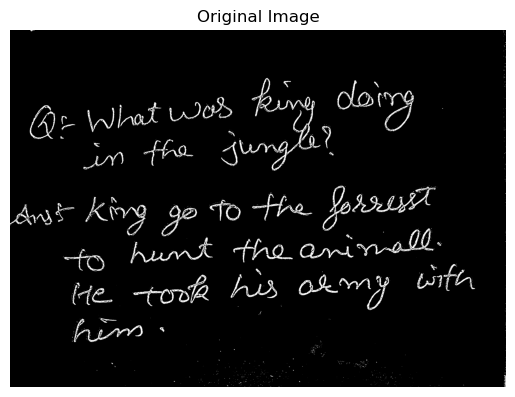

  

ae a aN eS aaa , A

 



In [178]:
import cv2
import numpy as np

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Image Enhancement: Adjust brightness and contrast
    image = cv2.convertScaleAbs(image, alpha=1.5, beta=20)
    
    # Noise Removal: Apply Gaussian blur
    image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Binarization: Apply adaptive thresholding
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    # Deskewing: Detect lines and correct skew
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)
    
    # Calculate average angle of lines
    # angle = 0.0
    # count = 0
    # for line in lines:
    #     x1, y1, x2, y2 = line[0]
    #     angle += np.arctan2(y2 - y1, x2 - x1)
    #     count += 1
    # angle /= count
    
    # # Convert angle from radians to degrees
    # angle_deg = np.degrees(angle)
    
    # # Rotate the image to deskew
    # center = (image.shape[1] // 2, image.shape[0] // 2)
    # rotation_matrix = cv2.getRotationMatrix2D(center, angle_deg, 1.0)
    # rotated = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)
    
    # # Resize and Scaling: Resize the image
    # resized = cv2.resize(rotated, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
    
    return image

# Example usage
img = os.path.join(folderPath,os.listdir(folderPath)[1])
# img = cv2.imread(os.path.join(folderPath, img))
preprocessed_image = preprocess_image(img)
plt.imshow(preprocessed_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

recognized_text = pytesseract.image_to_string(preprocessed_image)
print(recognized_text)


In [179]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

import requests

from PIL import Image

/home/wesee/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [180]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

2024-05-16 12:21:32.527886: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-16 12:21:32.766814: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 12:21:34.260340: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using TensorFlow backend.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [184]:
image = cv2.imread(os.path.join(folderPath,os.listdir(folderPath)[0]))

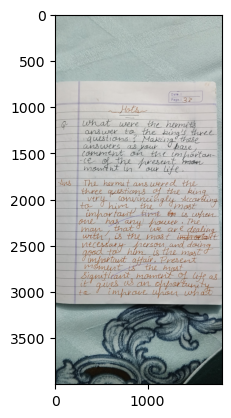

In [185]:
plt.imshow(image)

In [186]:
pixel_values = processor(image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

/home/wesee/anaconda3/lib/python3.11/site-packages/transformers/generation/utils.py:1254: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [187]:
generated_text

'the National Commission of the American Government of Australia'

In [ ]:
from deskew import determine_skew

In [204]:
import math
from typing import Tuple, Union

import cv2
import numpy as np

from deskew import determine_skew


def rotate(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]
) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)

image = cv2.imread(os.path.join(folderPath,os.listdir(folderPath)[0]))
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
angle = determine_skew(grayscale)
rotated = rotate(image, angle, (0, 0, 0))
cv2.imwrite('output.png', rotated)

True

In [205]:
recognized_text = pytesseract.image_to_string(rotated)

In [206]:
recognized_text

' \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nA LZI—ng\ntA CHL}\na\n\n| ecesket L LL USC LAY AC a\n-9gad te hie (hit msl 9\n\n]\nJ (wa Lud, AFF V ZA C4\n\n| MOmiunt 1x the Meas |\n| Siqautlegart mone. ot lise as\n| 0 Y J)\n\n( V>\n\nOLVUE WW Of fray Tua t\n\n| O d y Ie HAHA A (| pn WY\n\n \n\x0c'

In [5]:
import json
import pandas as pd

/home/wesee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [211]:
train_json = open('Dataset/IAM/train-labels.json')
train_json = json.load(train_json)


In [213]:
train_df = pd.DataFrame.from_dict(train_json, orient='index')




In [215]:
train_df.to_csv('Dataset/IAM/train.csv')

In [6]:
val_json = open('Dataset/IAM/valid-labels.json')
val_json = json.load(val_json)

val_df = pd.DataFrame.from_dict(val_json,orient='index')

val_df.to_csv('Dataset/IAM/val-labels.csv')

In [3]:
import os
os.getcwd()

'/home/wesee/Desktop/Anuj/Kaggle_competition/SpellError/SpellError'

In [4]:
import cv2
from htr_pipeline import read_page, DetectorConfig, LineClusteringConfig

# read image
img = cv2.imread('output.png', cv2.IMREAD_GRAYSCALE)

# detect and read text
read_lines = read_page(img, 
                       DetectorConfig(scale=0.35, margin=10 ), 
                       line_clustering_config=LineClusteringConfig(min_words_per_line=2, max_dist=2))

# output text
for read_line in read_lines:
    print(' '.join(read_word.text for read_word in read_line))

ME SIIUS EY
TEIER ES
IF TBERE WEVE THE TERNIES
IINSIVES CAPSUEY EISESTION TE LG I SYEN FHE MAKIIG 1 FEINGEST LEASE THESE FHXELY
EAD CCEMMET BF THE ON THED FXESEOY TINY I MISECTANY
PAOESSENE TI EUK DIFLRY
IND IT THE JAEKNAIE EASSUWECED FLL
HAXEL AQURSTICA IF HAEST
FORT WERY IY BAIKY IETIACIAGH AESTENG
IT LOME TINALAOLLARY MASWAN IEIAL I IS THES ESFPEY
WE LAKE BE
WITHYT IS THE TONER
BISNA AEESEY IS ELALY LAND HDOSNGES
ES E EXESENT
SD TMGEST
TIKET BIGSFLAUSY WINEL LAVE MNOSEATE GEFPTPERY IF ZGITY KIFF IAS
ATEL TSAPKOXLED HEFPIEY SAAL
-Y A
A A AY IS A A AN I EN A A AT SS I A
A SOY AS AS ESN AL AS H AY AS
RS AACS IH


In [1]:
import cv2
import pytesseract
from PIL import Image
import numpy as np

# Configure the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'path_to_your_tesseract_executable'

def preprocess_image(image_path):
    """Load an image, convert to grayscale, apply thresholding, and deskew."""
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur and thresholding
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Deskew image
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    corrected_img = cv2.warpAffine(img, M, (w, h),
                                   flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
   
    return corrected_img

def extract_text(image):
    """Use PyTesseract to extract text from an image."""
    text = pytesseract.image_to_string(image, lang='eng')
    return text

def main():
    image_path = 'output.png'
    processed_image = preprocess_image(image_path)
    text = extract_text(processed_image)
   
    print("Extracted Text:")
    print(text)

if __name__ == '__main__':
    main()

/home/wesee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


TesseractNotFoundError: path_to_your_tesseract_executable is not installed or it's not in your PATH. See README file for more information.